In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # bir olayın olmuş bir bilgiye göre olma olasılığını hesaplar
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('dataset/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [3]:
df = df[['text', 'label_num']]
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [4]:
# Stopword kaldırma işlemi. -> the, at, on, is
# Stem işlemi(Kelimeleri köklerine ayırma) -> runnig -> run, ran -> run

import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

nltk.download("stopwords")
ps = PorterStemmer()

def clean_text(text : str) -> str:
    text = text.lower()
    text = text.translate(str.maketrans("", "",string.punctuation )) #bütün noktalama işaretlerini boş metin ile değiştir

    words = text.split() 
    words = [word for word in words if not word.isdigit()]

    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return " ".join(words)

clean_text("Subject: enron methanol ; meter # : 988291\nth..")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'subject enron methanol meter th'

In [5]:
df['clean_text'] = df['text'].apply(clean_text)

In [6]:
df.head(3)

,text,label_num,clean_text
0,Subject: enron methanol ; meter # : 988291\nth...,0,subject enron methanol meter follow note gave ...
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,subject hpl nom januari see attach file hplnol...
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,subject neon retreat ho ho ho around wonder ti...


In [7]:
X = df['clean_text']
y = df['label_num']

tfidf = TfidfVectorizer() 
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray() # bizim eğiteceğimiz veri metinsel veri olduğu için tfidf ile sayısal verilere dönüştürüyoruz

X_tfidf # cümlelerin sayısal gösterimi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [9]:
bs = MultinomialNB()
bs.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred = bs.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Doğruluk oranı 0 - 1 arasında bir değer döner
acc = accuracy_score(y_test, y_pred)
acc

0.9110824742268041

In [12]:
# Sınıflandırma raporu
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1121
           1       1.00      0.68      0.81       431

    accuracy                           0.91      1552
   macro avg       0.95      0.84      0.88      1552
weighted avg       0.92      0.91      0.91      1552



<Axes: >

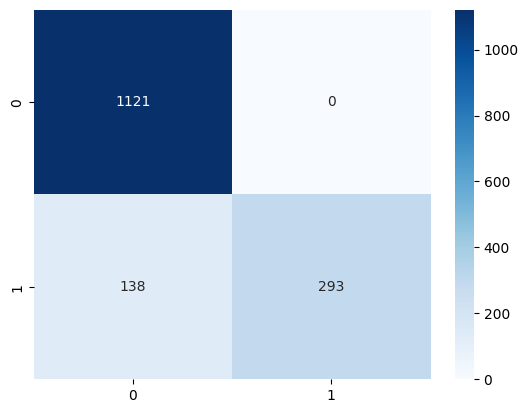

In [13]:
# Karışıklık matrisi
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [14]:
import os
from pathlib import Path
import joblib

BASE_DIR = os.getcwd() 
BASE_DIR = Path().resolve() 

joblib.dump(bs, os.path.join(BASE_DIR, "spam_model.joblib"))
joblib.dump(tfidf, os.path.join(BASE_DIR, "tfidf_vectorizer.joblib"))


['C:\\Users\\Asus\\Desktop\\E-Posta Spam Tespiti\\tfidf_vectorizer.joblib']